# Write a program to show the implementation of agglomerative hierarchical clustering (single, complete and average linkage) using the below mentioned dataset. Show the resultant clusters using graph and dendrogram.
1. Consider Euclidean distance as measure
2.  Handle missing values, if any
3. Implement cross validation

**Importing libraries**

In [119]:
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams["figure.figsize"] = (20,10)

**Importing Absenteeism dataset and selecting required columns**

In [6]:
dataset = pd.read_excel('Absenteeism.xls')

X = dataset.iloc[:, [8, 9]].values #workload avg and age

**Single Linkage Dendogram**

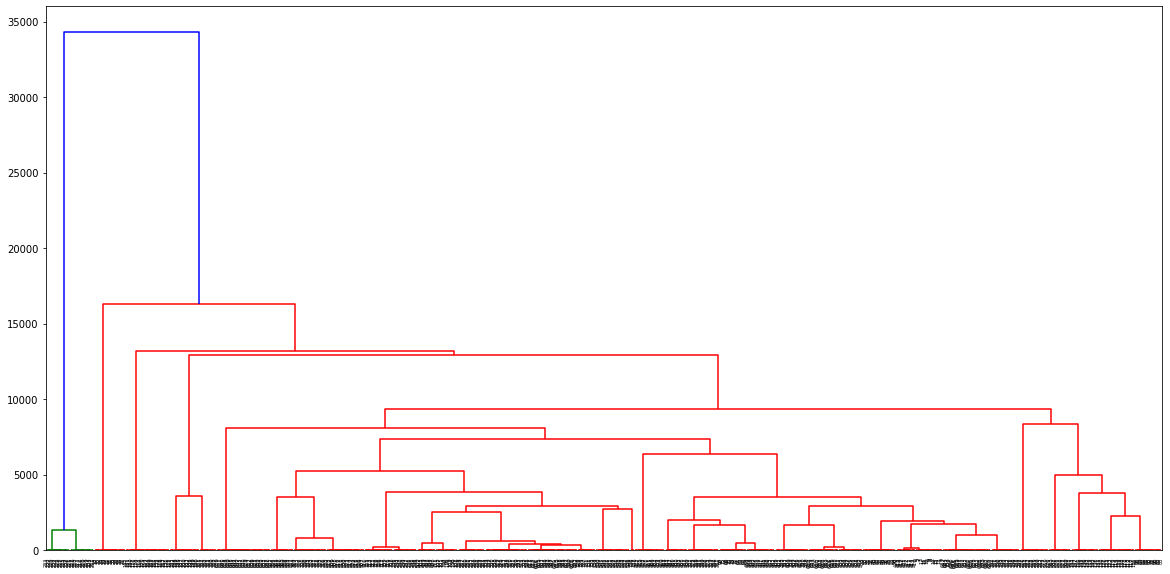

In [133]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

**Single Linkage Graph**

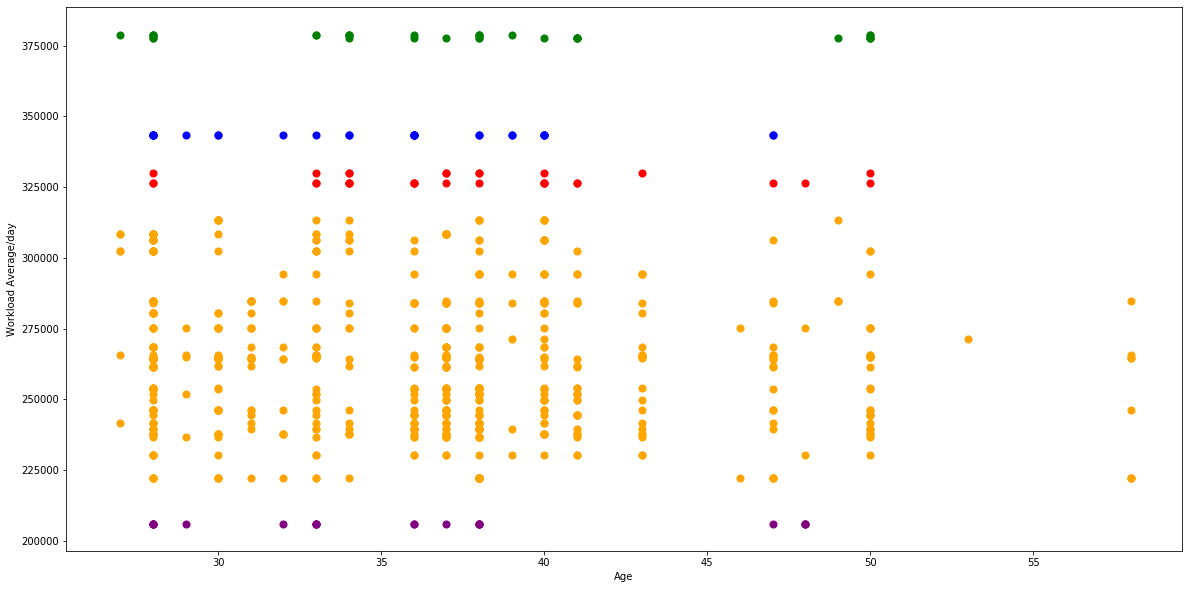

In [140]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='green')
plt.xlabel("Age")
plt.ylabel("Workload Average/day")
plt.show()

**Complete Linkage Dendogram**

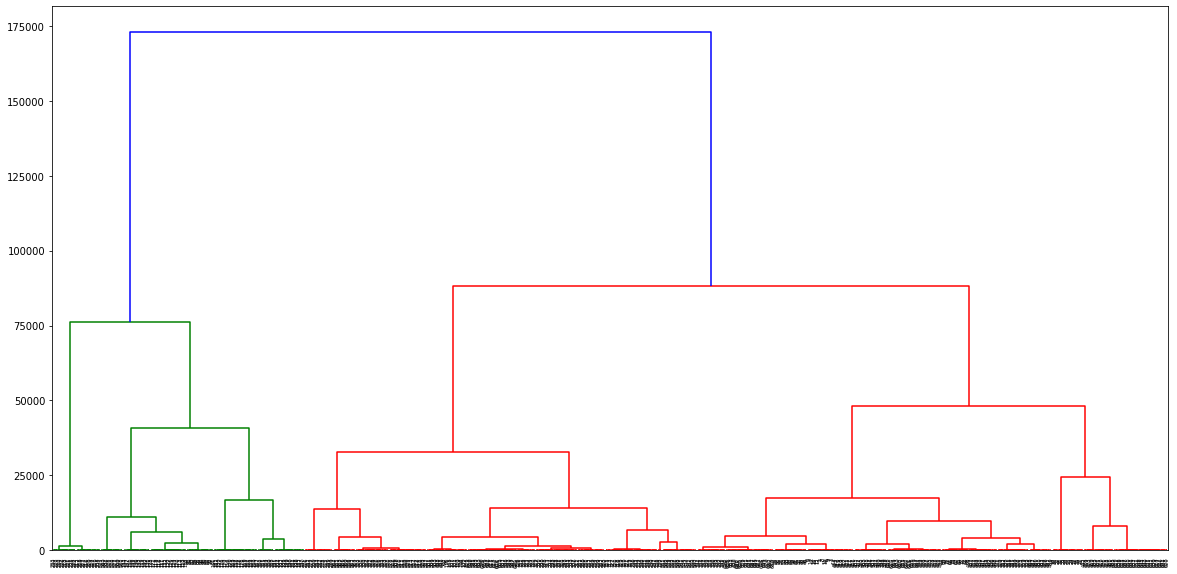

In [135]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

**Complete Linkage Graph**

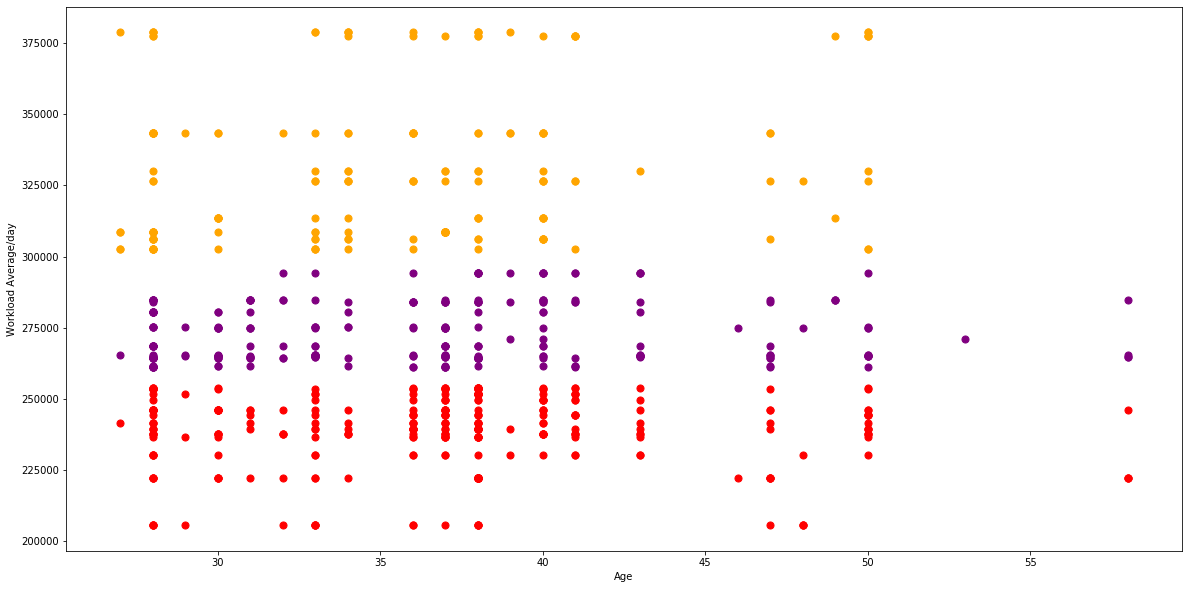

In [141]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='green')
plt.xlabel("Age")
plt.ylabel("Workload Average/day")
plt.show()

**Average Linkage Dendogram** 

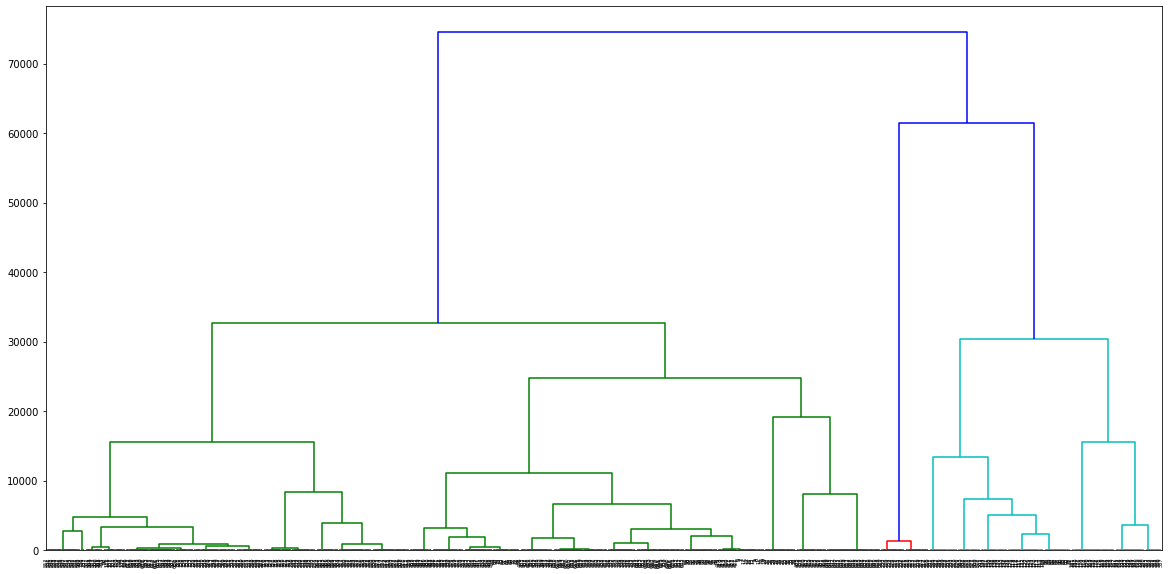

In [137]:
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

**Average Linkage Graph**

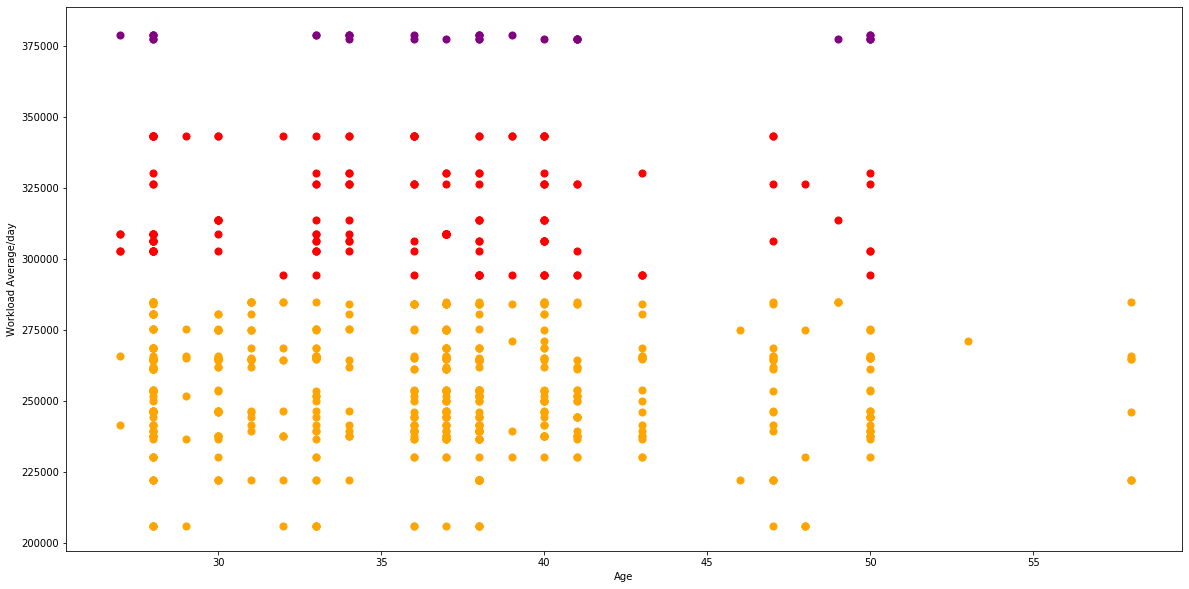

In [142]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='green')
plt.xlabel("Age")
plt.ylabel("Workload Average/day")
plt.show()

# Write a program to show the implementation of apriori algorithm using web log usage data for web usage mining purpose. (Consider any publicly available web log data to show the implementation.) 

**Dataset used - https://www.kaggle.com/shawon10/web-log-dataset**

In [67]:
weblog = pd.read_csv("weblog.csv")

weblog.info() #basic info of the dataset
weblog.IP.unique() #unique IPs that exist in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16007 entries, 0 to 16006
Data columns (total 4 columns):
IP       16007 non-null object
Time     16007 non-null object
URL      16007 non-null object
Staus    16007 non-null object
dtypes: object(4)
memory usage: 500.3+ KB


array(['10.128.2.1', '10.131.2.1', '10.130.2.1', '10.129.2.1',
       '10.131.0.1', 'chmod:', 'rm:', 'timeout:', 'sh:', 'a.out:', '[Tue',
       '[Wed', '[Thu', '[Fri', '[Sat', '[Mon'], dtype=object)

**Removing irrelevant IP addresses**

In [ ]:
weblog = weblog[weblog.IP != 'chmod:']
weblog = weblog[weblog.IP != 'rm:']
weblog = weblog[weblog.IP != 'timeout:']
weblog = weblog[weblog.IP != 'sh:']
weblog = weblog[weblog.IP != 'a.out:']
weblog = weblog[weblog.IP != '[Tue']
weblog = weblog[weblog.IP != '[Wed']
weblog = weblog[weblog.IP != '[Thu']
weblog = weblog[weblog.IP != '[Fri']
weblog = weblog[weblog.IP != '[Sat']
weblog = weblog[weblog.IP != '[Mon']


**Import Apyori algorithm and make list of lists as input for apriori algorithm** 

In [149]:
from apyori import apriori
observations = [] 
for i in range(len(weblog)):
    observations.append([str(weblog.values[i,j]) for j in range(4)])
#Printing first 50 observations
for i in range(50):
    print(observations[i])

['10.128.2.1', '[29/Nov/2017:06:58:55', 'GET /login.php HTTP/1.1', '200']
['10.128.2.1', '[29/Nov/2017:06:59:02', 'POST /process.php HTTP/1.1', '302']
['10.128.2.1', '[29/Nov/2017:06:59:03', 'GET /home.php HTTP/1.1', '200']
['10.131.2.1', '[29/Nov/2017:06:59:04', 'GET /js/vendor/moment.min.js HTTP/1.1', '200']
['10.130.2.1', '[29/Nov/2017:06:59:06', 'GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1', '200']
['10.130.2.1', '[29/Nov/2017:06:59:19', 'GET /profile.php?user=bala HTTP/1.1', '200']
['10.128.2.1', '[29/Nov/2017:06:59:19', 'GET /js/jquery.min.js HTTP/1.1', '200']
['10.131.2.1', '[29/Nov/2017:06:59:19', 'GET /js/chart.min.js HTTP/1.1', '200']
['10.131.2.1', '[29/Nov/2017:06:59:30', 'GET /edit.php?name=bala HTTP/1.1', '200']
['10.131.2.1', '[29/Nov/2017:06:59:37', 'GET /logout.php HTTP/1.1', '302']
['10.131.2.1', '[29/Nov/2017:06:59:37', 'GET /login.php HTTP/1.1', '200']
['10.130.2.1', '[29/Nov/2017:07:00:19', 'GET /login.php HTTP/1.1', '200']
['10.130.2.1', '[29/Nov/2017:07:00:21',

**Create Apriori Model and view the resultant rules**

We can see the URLs a single IP will visit given the status code it receives.

In [70]:
association_rules = apriori(observations, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=3)
association_results = list(association_rules)
for i in range(len(association_results)):
    print(association_results[i])
    print("\n")

RelationRecord(items=frozenset({'302', 'GET / HTTP/1.1'}), support=0.04622977447366777, ordered_statistics=[OrderedStatistic(items_base=frozenset({'302'}), items_add=frozenset({'GET / HTTP/1.1'}), confidence=0.2115494568324757, lift=3.9329525615765837), OrderedStatistic(items_base=frozenset({'GET / HTTP/1.1'}), items_add=frozenset({'302'}), confidence=0.859465737514518, lift=3.9329525615765837)])


RelationRecord(items=frozenset({'302', 'GET /home.php HTTP/1.1'}), support=0.13475354532392078, ordered_statistics=[OrderedStatistic(items_base=frozenset({'302'}), items_add=frozenset({'GET /home.php HTTP/1.1'}), confidence=0.6166380789022298, lift=3.738835503404543), OrderedStatistic(items_base=frozenset({'GET /home.php HTTP/1.1'}), items_add=frozenset({'302'}), confidence=0.8170454545454546, lift=3.7388355034045433)])


RelationRecord(items=frozenset({'POST /action.php HTTP/1.1', '302'}), support=0.004997813456612732, ordered_statistics=[OrderedStatistic(items_base=frozenset({'POST /action

# Consider the COVID-19 dataset for India given in the following link. Analyze the dataset to cluster various states in India with respect to number of active cases, death rate, recovery rate and testing-confirm cases ratio.
[Use any TWO
clustering algorithms of your choice and provide the performance analysis of the
techniques used w.r.t. results obtained.]

**DATASET USED - https://data.thejeshgn.com/covid19/_design/india/_view/incidents?descending=false**

This dataset was considered because it is regularly updated everyday and data values are properly sanitised. The data is also sourced from official government sources and maintained by a strong open source organisation.

**Import libraries** 

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Import Dataset and normalize it according to "rows" column because the data is in the form of nested JSON response**

In [81]:
from pandas.io.json import json_normalize
data = pd.read_json('https://data.thejeshgn.com/covid19/_design/india/_view/incidents?descending=false') 
data = json_normalize(data['rows'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8964 entries, 0 to 8963
Data columns (total 13 columns):
id                         8964 non-null object
key                        8964 non-null object
value._id                  8964 non-null object
value._rev                 8964 non-null object
value.confirmed            8964 non-null int64
value.confirmed_foreign    852 non-null float64
value.confirmed_india      852 non-null float64
value.cured                8964 non-null int64
value.death                8964 non-null int64
value.report_time          8964 non-null object
value.source               8964 non-null object
value.state                8964 non-null object
value.type                 8964 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 910.5+ KB


**Creating another dataset to store just "confirmed", "cured" and "deaths"**

In [78]:
from pandas.io.json import json_normalize
data = pd.read_json('https://data.thejeshgn.com/covid19/_design/india/_view/incidents?descending=false') 
data2 = json_normalize(data['rows'])
data2.drop(data2.index)

,id,key,value._id,value._rev,value.confirmed,value.confirmed_foreign,value.confirmed_india,value.cured,value.death,value.report_time,value.source,value.state,value.type


**Adding the latest (13th Oct 2020) data**

In [87]:
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|kl']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|wb']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|up']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|ut']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|tr']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|tn']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|tg']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|sk']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|rj']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|py']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|pb']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|or']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|nl']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|mz']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|mp']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|mn']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|mh']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|ld']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|la']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|ka']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|jk']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|jh']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|hr']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|hp']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|gj']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|ga']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|dn_dd']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|dl']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|ct']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|ch']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|br']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|as']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|ar']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|ap']
data2 = pd.concat([data2,entry])
entry = data.loc[data["key"] == '2020-10-13T08:00:00.00+05:30|an']
data2 = pd.concat([data2,entry])


In [88]:
data2[["value.confirmed", "value.cured", "value.death"]]

,value.confirmed,value.cured,value.death
0,1,0,0
1,2,0,0
2,3,0,0
3,1,0,0
4,3,0,0
5,1,0,0
6,1,0,0
7,3,0,0
8,1,0,0
9,1,0,0


**K-Means Analysis (We cluster based on 3 parameters - confirmed cases, cured cases and number of deaths)**

In [98]:
kmeans = KMeans(init="random",n_clusters=5,n_init=10,max_iter=300,random_state=42)
kmeans.fit(data2[["value.confirmed", "value.cured", "value.death"]])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [146]:
#To view labels uncomment this code 

#kmeans.labels_

**Confirmed cases vs Cured cases**

Text(0, 0.5, 'Cured cases')

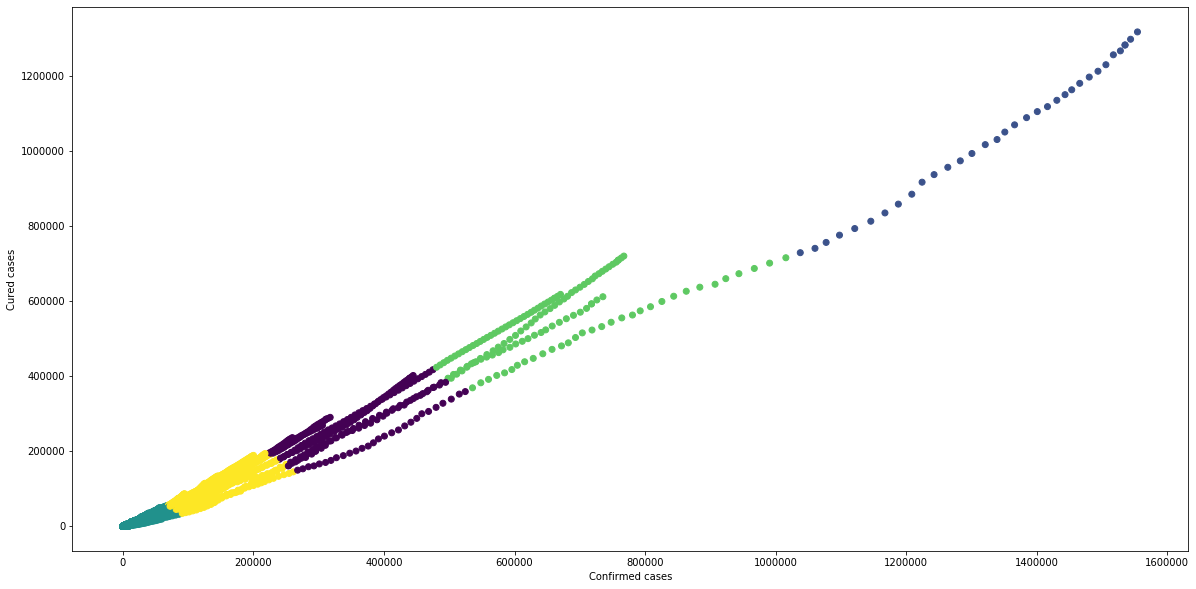

In [132]:
plt.scatter(data2["value.confirmed"], data2["value.cured"], c=kmeans.labels_)
plt.xlabel("Confirmed cases")
plt.ylabel("Cured cases")

#Try labelling the states but does not look good. So skip

#xs = pd.Series(data2['value.death']) 
#ys = pd.Series(data2['value.confirmed'])
#for x,y in zip(xs,ys):
#    i = 0
#    label = data["value.state"][i] 
#    i = i+1
#   plt.annotate(label, # this is the text
#               (x,y), # this is the point to label
#              textcoords="offset points", # how to position the text
#             xytext=(0,10), # distance from text to points (x,y)
#            ha='center') # horizontal alignment can be left, right or center

**Cured cases vs Number of Deaths**

Text(0, 0.5, 'Number of Deaths')

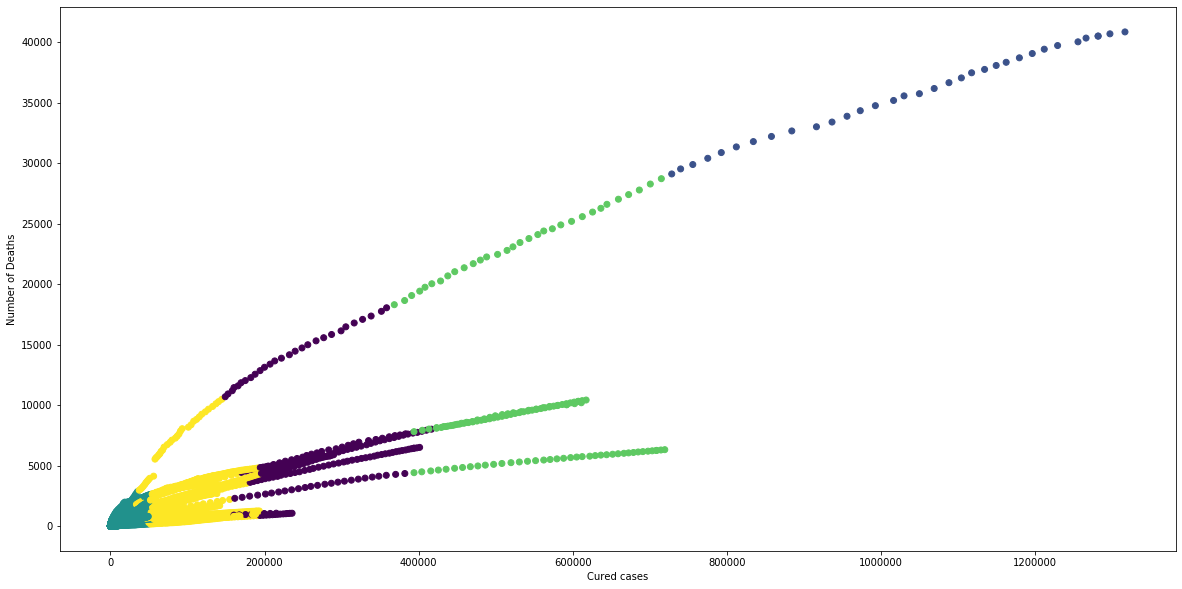

In [131]:
plt.scatter(data2["value.cured"], data2["value.death"], c=kmeans.labels_)
plt.xlabel("Cured cases")
plt.ylabel("Number of Deaths")

**Number of deaths vs Confirmed cases**

Text(0, 0.5, 'Confirmed cases')

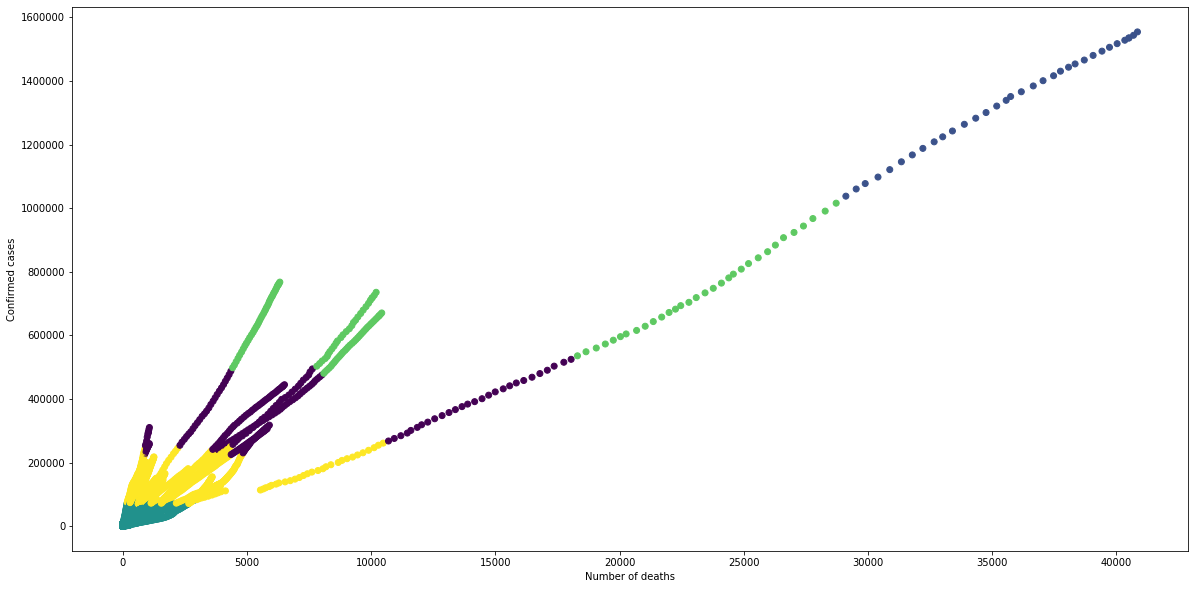

In [130]:
plt.scatter(data2["value.death"], data2["value.confirmed"], c=kmeans.labels_)
plt.xlabel("Number of deaths")
plt.ylabel("Confirmed cases")

**Agglomerative Clustering (Again we cluster based on 3 parameters - confirmed cases, cured cases and number of deaths)**

In [147]:
agglomerative = AgglomerativeClustering()
# fit model and predict clusters
yhat = agglomerative.fit_predict(data2[["value.confirmed", "value.cured", "value.death"]])
#To view labels created for each datapoint uncomment code
#yhat

In [90]:
from numpy import unique
from numpy import where
#find number of clusters created
clusters = unique(yhat)
clusters

array([0, 1, 2], dtype=int64)

In [148]:
#To get row indexes of samples in each cluster uncomment this block of code

#for cluster in clusters:
#  row_ix = where(yhat == cluster)
#  print(row_ix)

**Confirmed cases vs cured cases**

Text(0, 0.5, 'Cured cases')

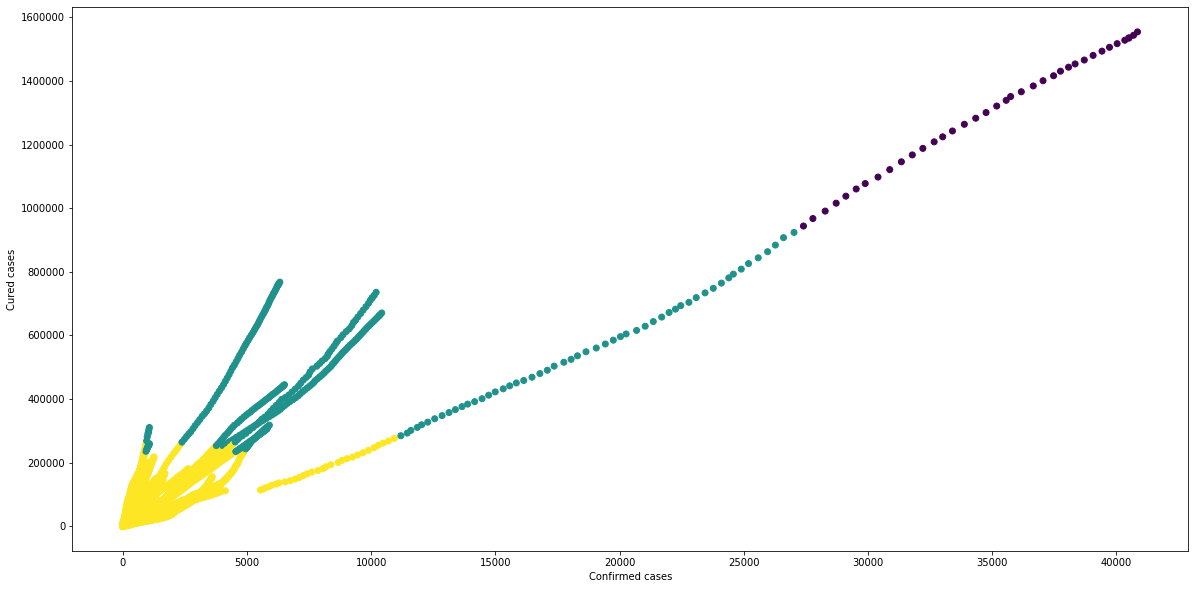

In [127]:
plt.scatter(data2["value.death"], data2["value.confirmed"], c=yhat)
plt.xlabel("Confirmed cases")
plt.ylabel("Cured cases")

#Try labelling the states but does not look good. So skip

#xs = pd.Series(data2['value.death']) 
#ys = pd.Series(data2['value.confirmed'])
#for x,y in zip(xs,ys):
#    i = 0
#    label = data["value.state"][i] 
#    i = i+1
#   plt.annotate(label, # this is the text
#               (x,y), # this is the point to label
#              textcoords="offset points", # how to position the text
#             xytext=(0,10), # distance from text to points (x,y)
#            ha='center') # horizontal alignment can be left, right or center

**Cured cases vs Number of Deaths**

Text(0, 0.5, 'Number of Deaths')

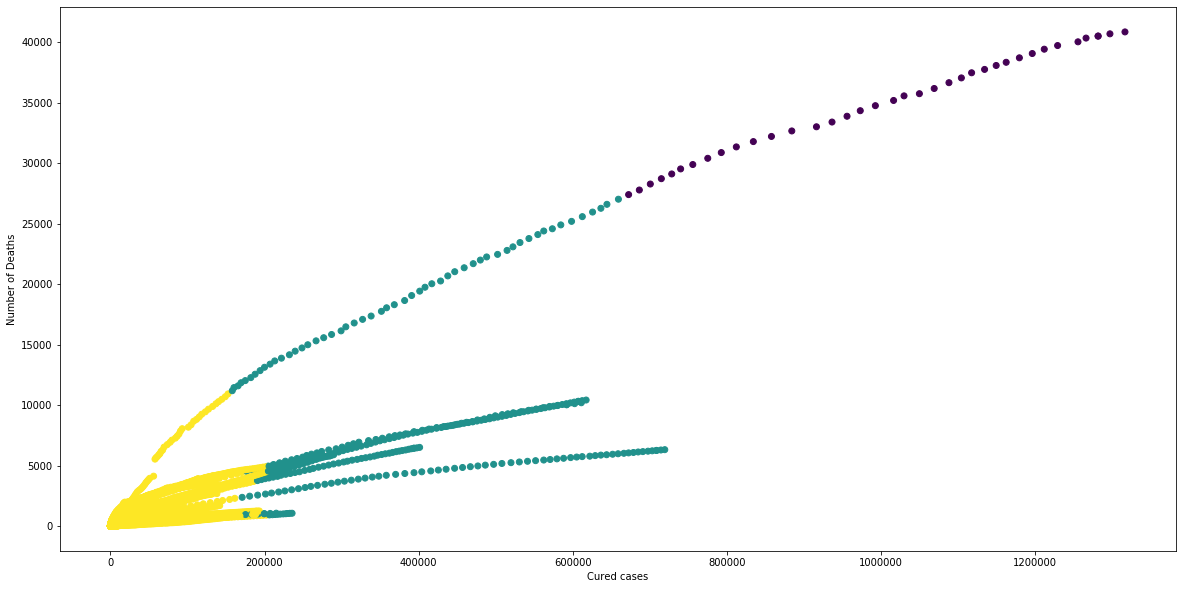

In [128]:
plt.scatter(data2["value.cured"], data2["value.death"], c=yhat)
plt.xlabel("Cured cases")
plt.ylabel("Number of Deaths")

**Number of Deaths vs Confirmed cases**

Text(0, 0.5, 'Confirmed cases')

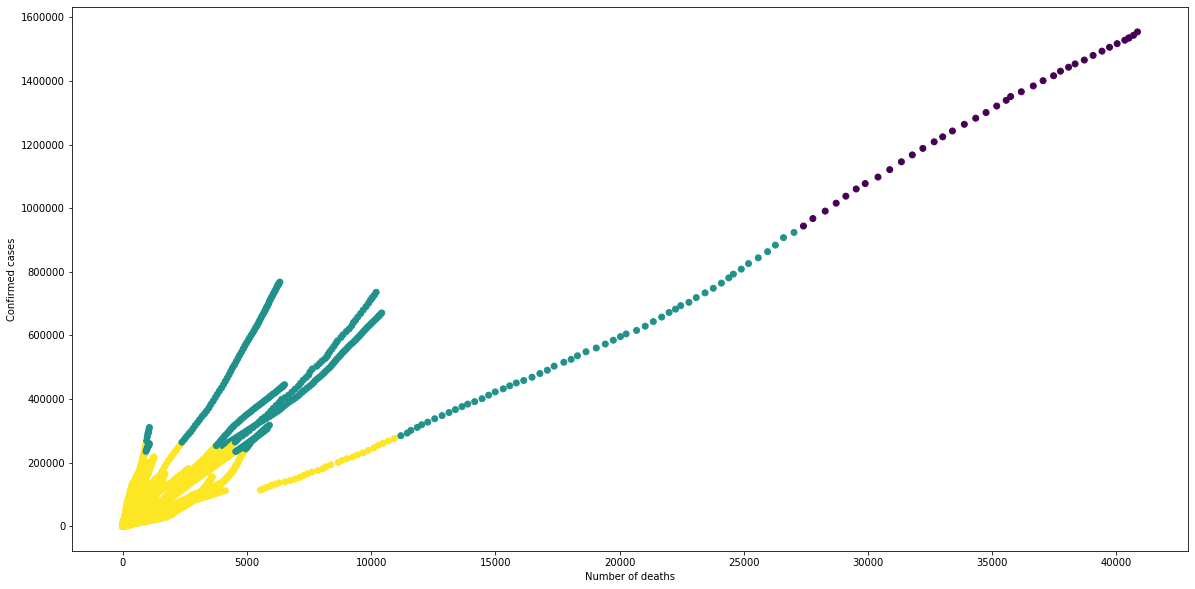

In [129]:
plt.scatter(data2["value.death"], data2["value.confirmed"], c=yhat)
plt.xlabel("Number of deaths")
plt.ylabel("Confirmed cases")